# Code Alpha Internship Programm Task3 :Stock Prediction Using LSTM Model

In [46]:
import pandas as pd
import numpy as np


In [47]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
#The target variable is charges which is a continuous variable

In [49]:
df.shape

(1338, 7)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


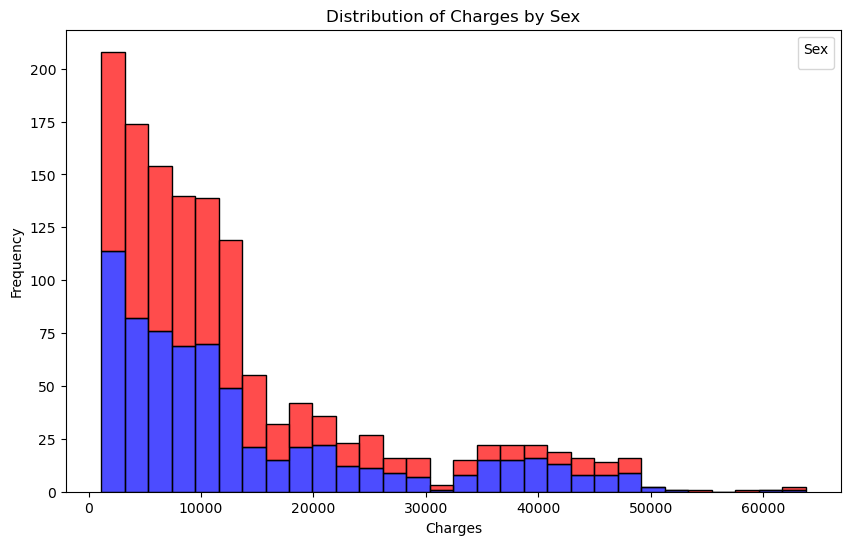

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme des charges par sexe avec couleurs spécifiées
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='sex', multiple='stack', bins=30, palette={'male': 'blue', 'female': 'red'}, alpha=0.7)
plt.title('Distribution of Charges by Sex')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend(title='Sex')  # La légende sera automatiquement mise à jour avec les couleurs spécifiées
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


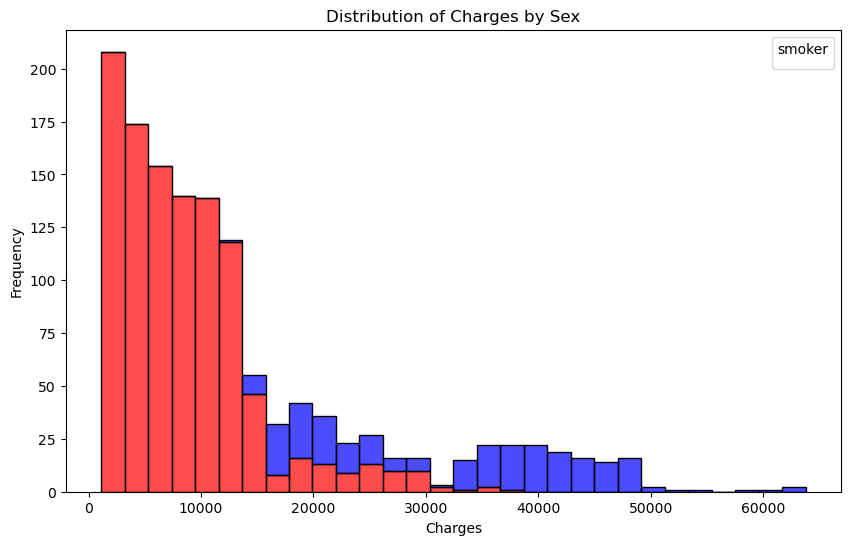

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme des charges par sexe
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', multiple='stack', bins=30, palette={'yes': 'blue', 'no': 'red'}, alpha=0.7)
plt.title('Distribution of Charges by Sex')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend(title='smoker')
plt.show()


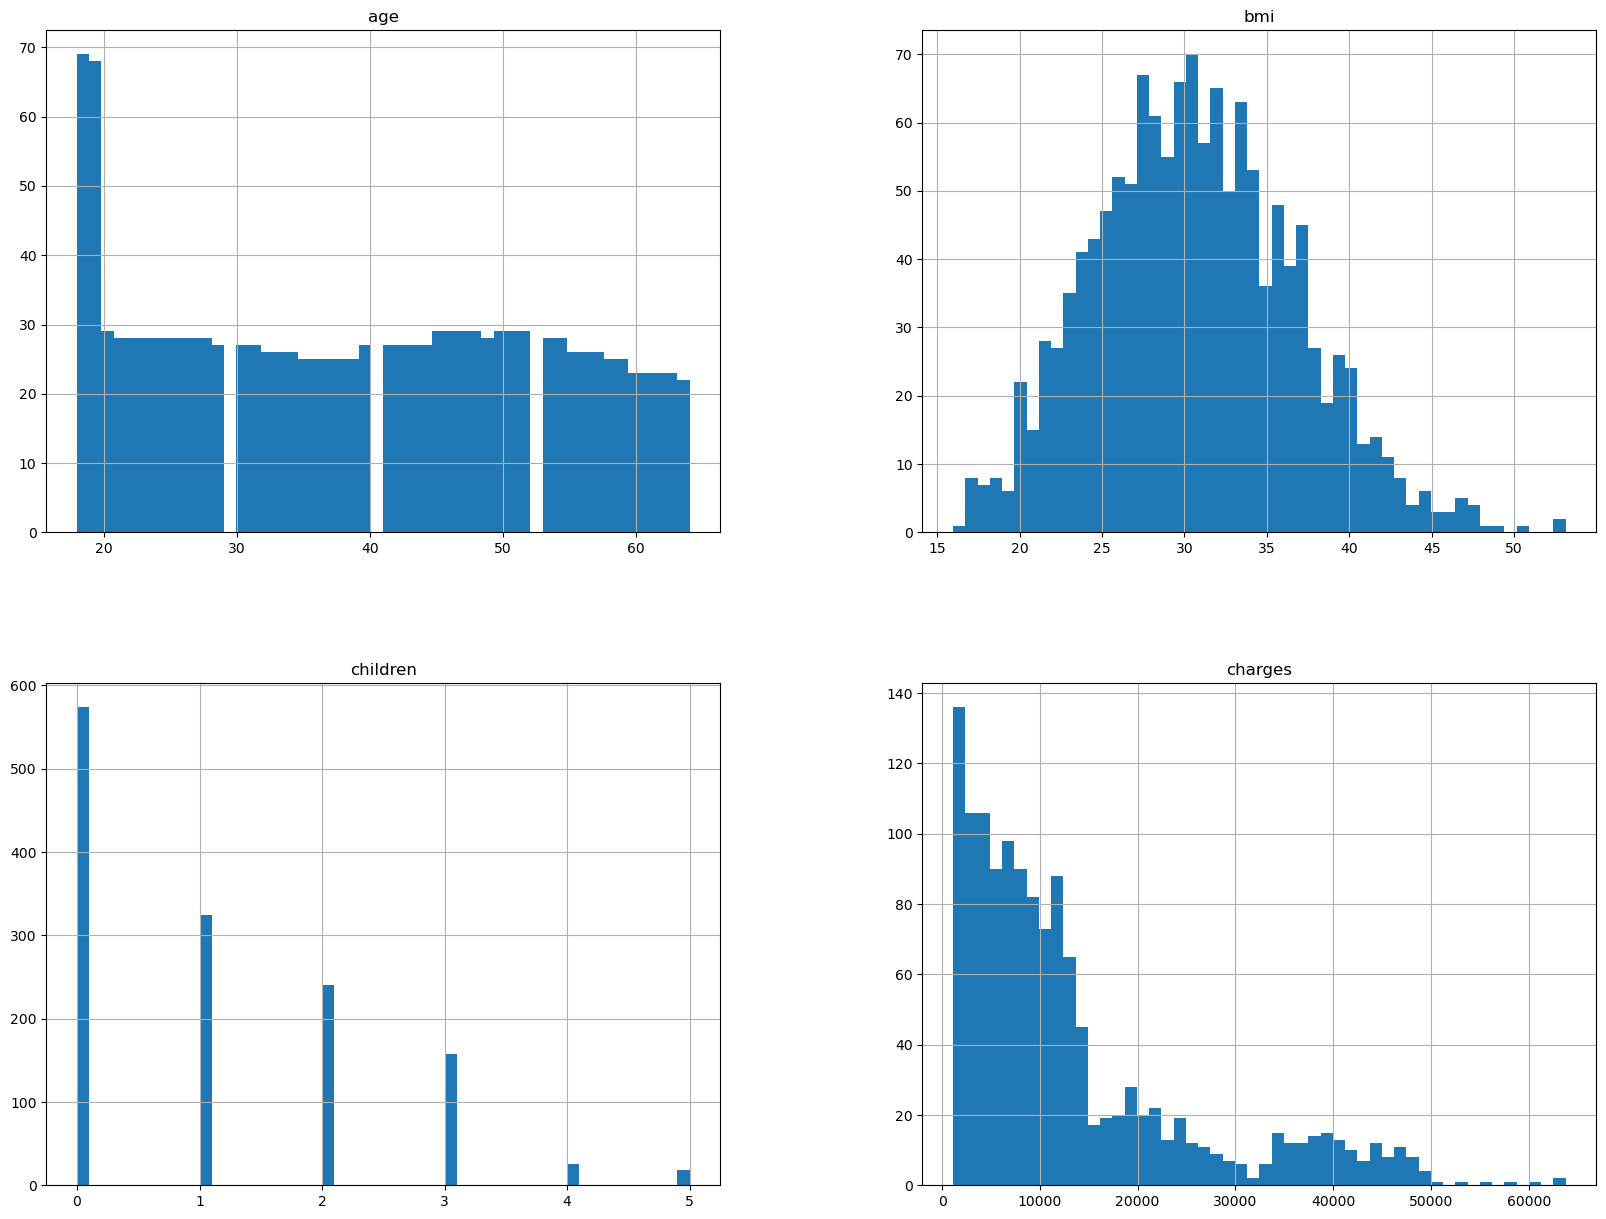

In [54]:
df.hist(bins=50, figsize=(20,15))
plt.show()

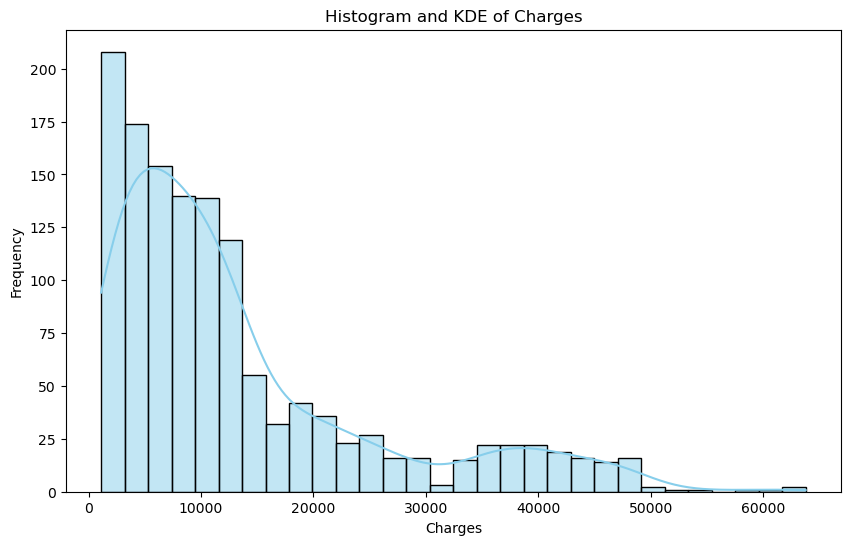

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE overlay for 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram and KDE of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


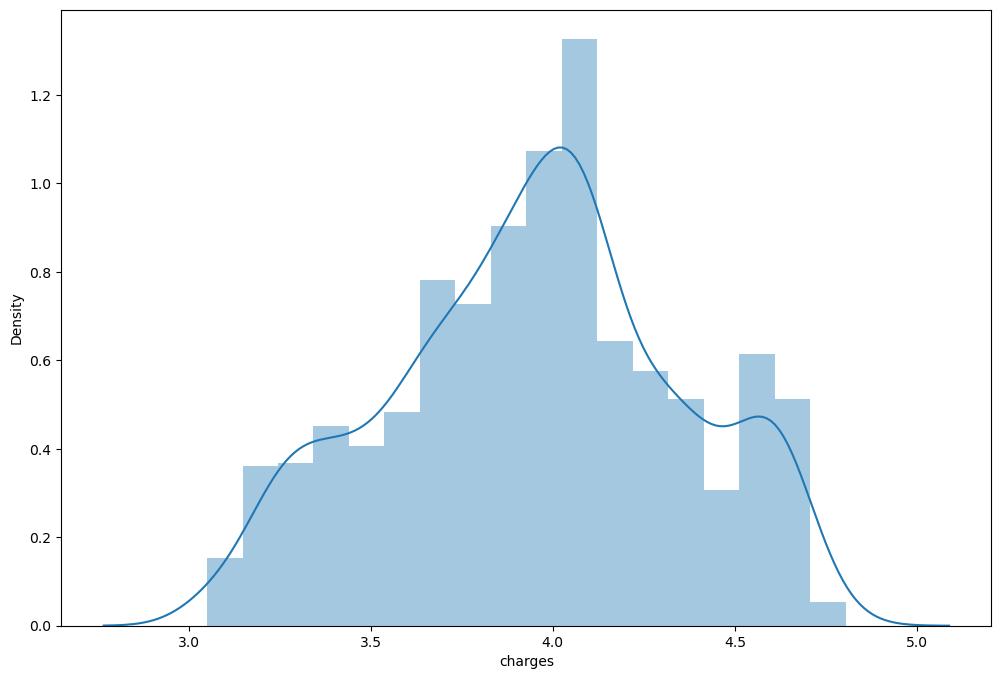

In [56]:

# Apply log transformation
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, )

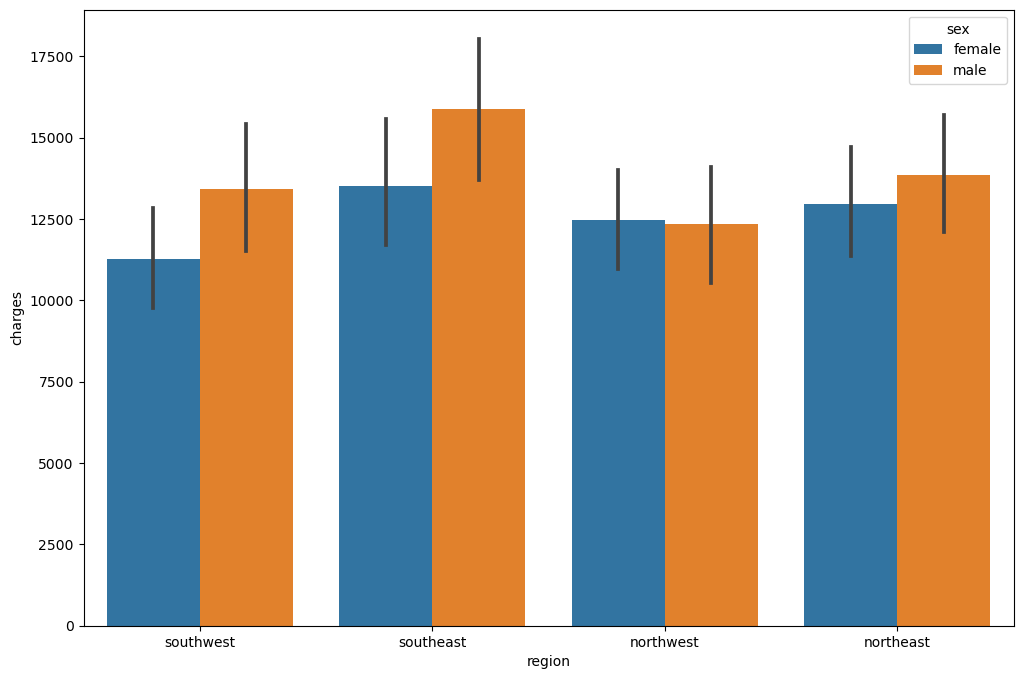

In [57]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df)

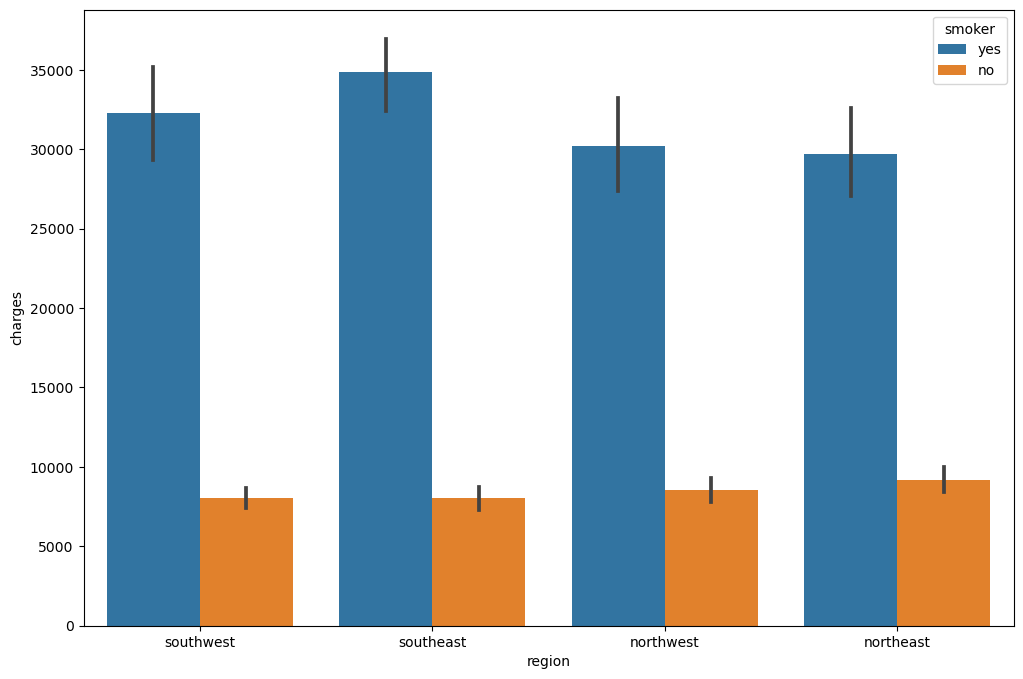

In [58]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df )

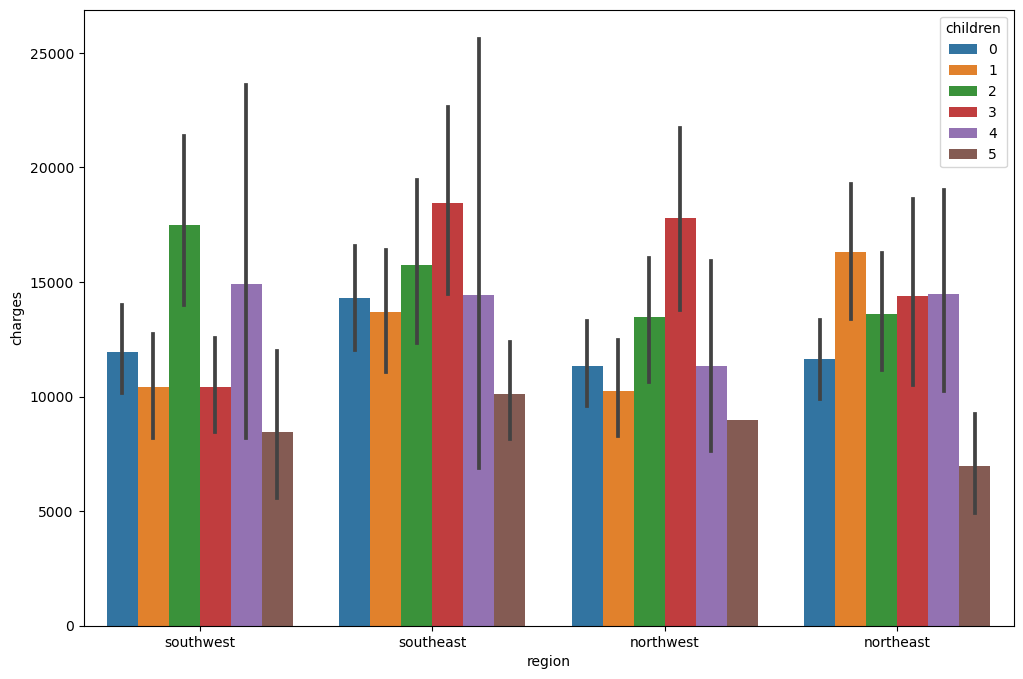

In [59]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df)

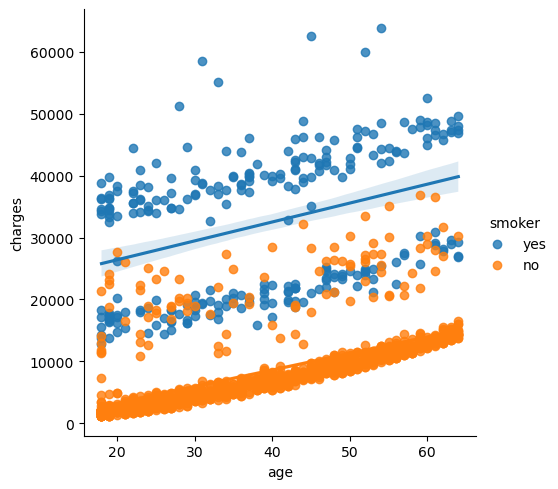

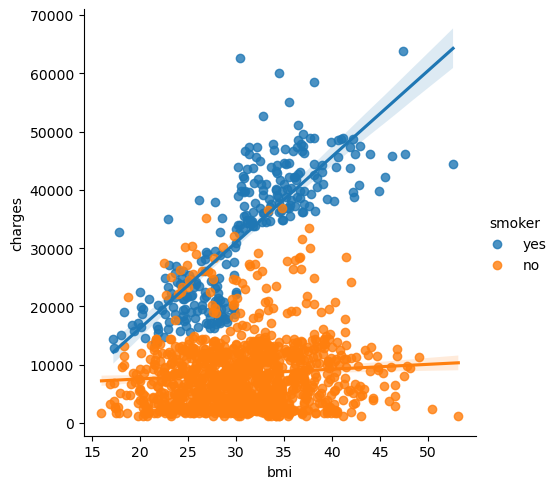

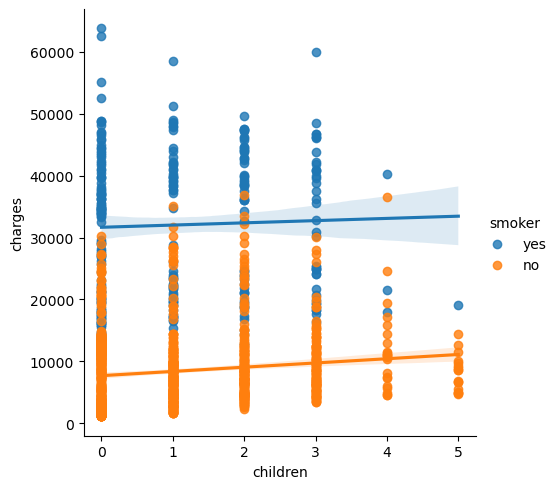

In [60]:
#Now let's analyze the medical charges by age, bmi and children according to the smoking factor

ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')

In [61]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'sex' column
label = LabelEncoder()
df.sex = label.fit_transform(df.sex)

# Encoding 'smoker' column
df.smoker = label.fit_transform(df.smoker)

# Encoding 'region' column
df.region = label.fit_transform(df.region)

df.dtypes


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [63]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
#yaaaay no missing values 

In [65]:
# Split the data into features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 4186.5088983664355
Mean Squared Error (MSE): 33635210.431178436
Root Mean Squared Error (RMSE): 5799.587091438359
R-squared (R2 ): 0.7833463107364537


C:\Users\DELL\AppData\Local\Temp\ipykernel_11768\1336520730.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')


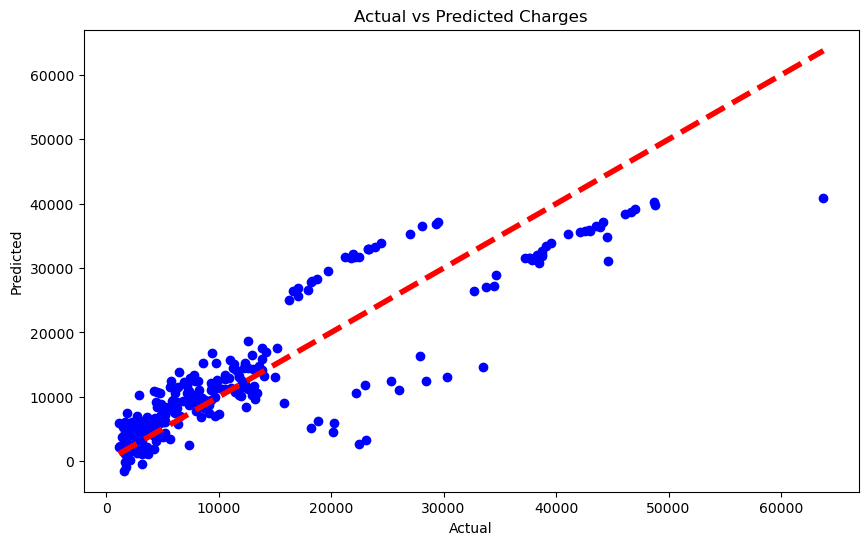

In [67]:
# Plotting the true values vs the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Charges')
plt.show()

Random Forest Mean Absolute Error (MAE): 2518.4756348106666
Random Forest Mean Squared Error (MSE): 20898625.73754565
Random Forest Root Mean Squared Error (RMSE): 4571.501475177018
Random Forest R-squared (R2 ): 0.8653861739369313


C:\Users\DELL\AppData\Local\Temp\ipykernel_11768\3959469981.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color='red')


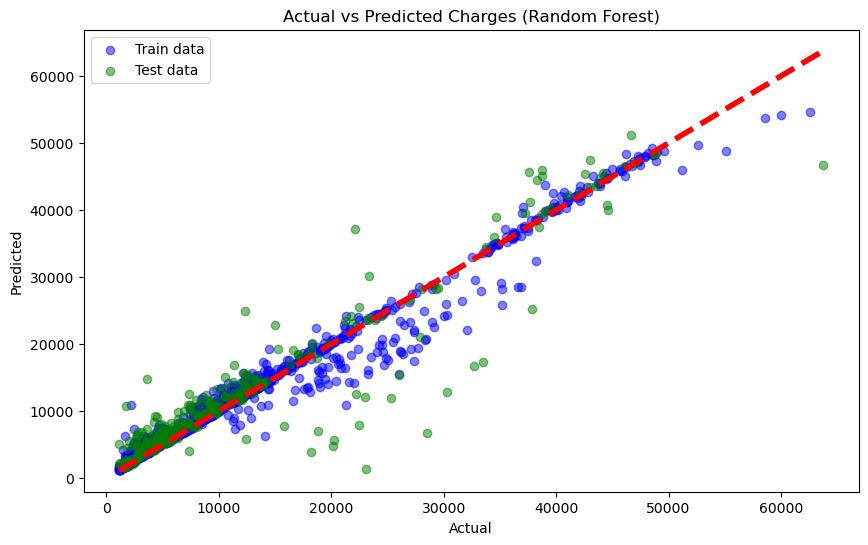

In [70]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf_model.predict(X_test)
# Predict the train and test set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest R-squared (R2 ): {r2_rf}")

# Plotting the true values vs the predicted values for both train and test data
plt.figure(figsize=(10, 6))

# Train data
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train data')
# Test data
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Test data')

# Identity line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Charges (Random Forest)')
plt.legend()
plt.show()